## TS-0 the basics

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.09.07 </div> 
<div style="text-align: right"> Last update: 2020.09.07</div> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime
import missingno as msno
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
from random import gauss
from pandas.plotting import autocorrelation_plot
import warnings
import itertools
from random import random

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [4]:
series = pd.read_csv('data/passengers.csv')

In [5]:
series

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<AxesSubplot:xlabel='date'>

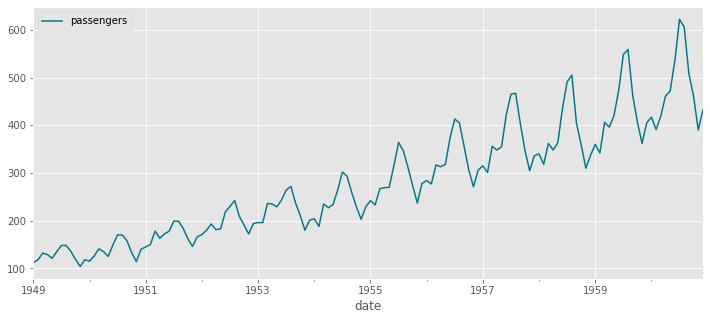

In [8]:
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(figsize =(12, 5), color = colors)

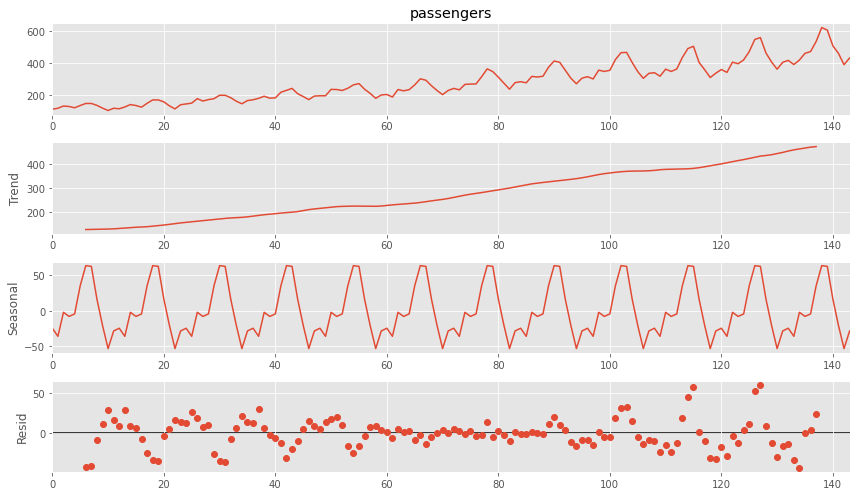

In [21]:
decomposition = sm.tsa.seasonal_decompose(series["passengers"],period =12) 
fig = decomposition.plot()
fig.set_size_inches((12, 7))
fig.tight_layout()
plt.show()

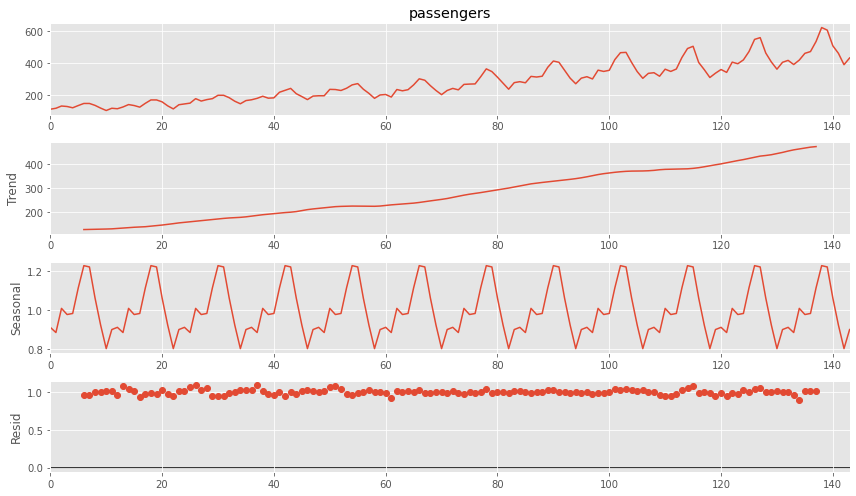

In [22]:
decomposition = sm.tsa.seasonal_decompose(series["passengers"],period =12, model='multiplicative') 
fig = decomposition.plot()
fig.set_size_inches((12, 7))
fig.tight_layout()
plt.show()

### Changes in level of savings in the US

In [23]:
series = pd.read_csv('data/savings_change.csv')

In [24]:
series

,date,delta_val
0,1970-01-01,4.810312
1,1970-04-01,7.287992
2,1970-07-01,7.289013
3,1970-10-01,0.985230
4,1971-01-01,3.657771
...,...,...
182,2015-07-01,3.180930
183,2015-10-01,3.482786
184,2016-01-01,2.236534
185,2016-04-01,-2.721501


<AxesSubplot:xlabel='date'>

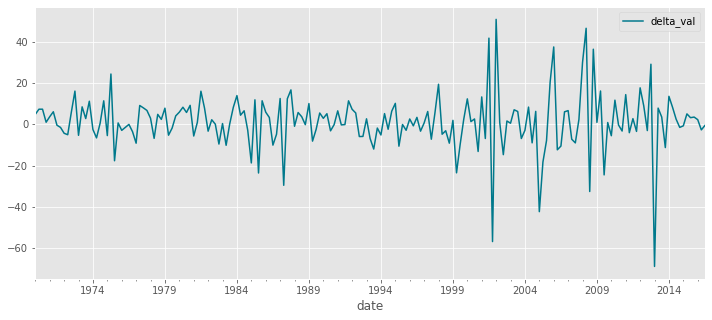

In [25]:
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(figsize =(12, 5), color = colors)

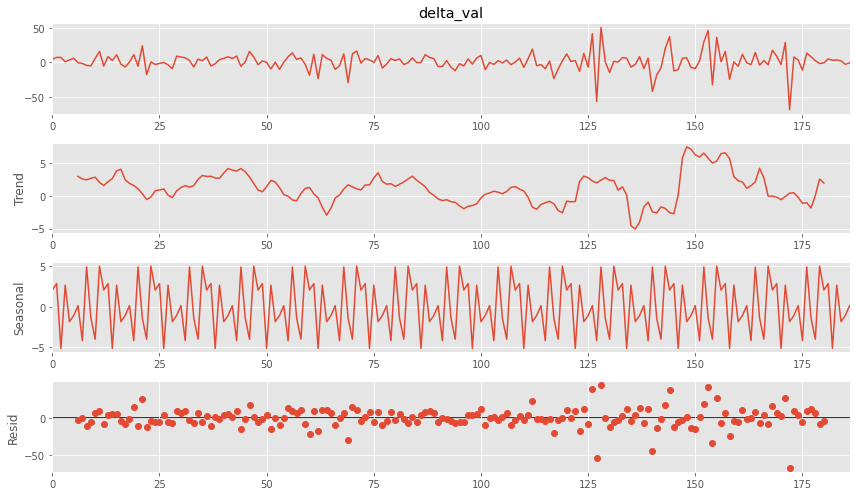

In [26]:
decomposition = sm.tsa.seasonal_decompose(series["delta_val"],period =12) 
fig = decomposition.plot()
fig.set_size_inches((12, 7))
fig.tight_layout()
plt.show()

### Annual averages of the daily sunspot areas

<AxesSubplot:xlabel='date'>

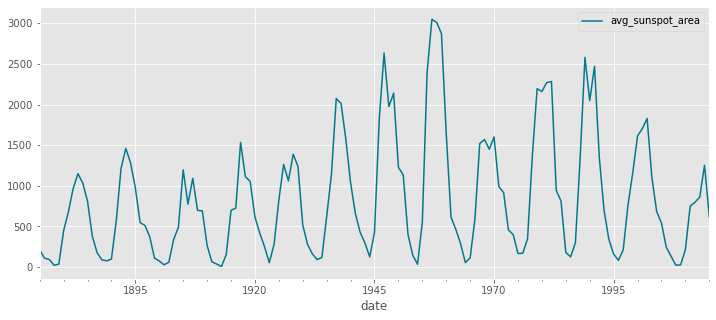

In [27]:
series = pd.read_csv('data/sunspots.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(figsize =(12, 5), color = colors)

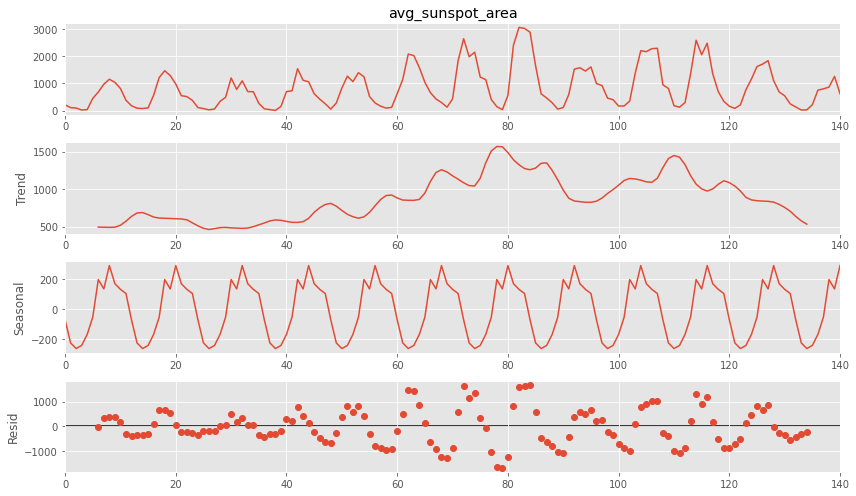

In [28]:
decomposition = sm.tsa.seasonal_decompose(series["avg_sunspot_area"],period =12) 
fig = decomposition.plot()
fig.set_size_inches((12, 7))
fig.tight_layout()
plt.show()

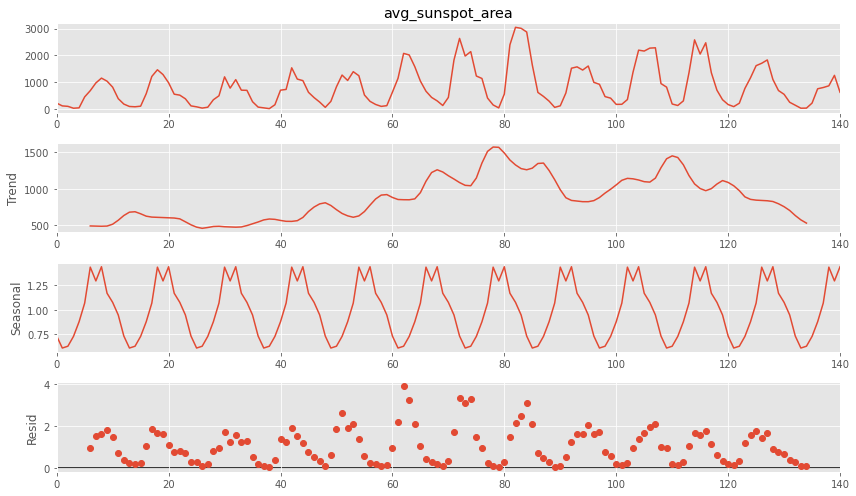

In [30]:
decomposition = sm.tsa.seasonal_decompose(series["avg_sunspot_area"],period =12, model = 'multiplicative') 
fig = decomposition.plot()
fig.set_size_inches((12, 7))
fig.tight_layout()
plt.show()

- multiplicative로 하면 resid가 완화되었다.

### Dependence

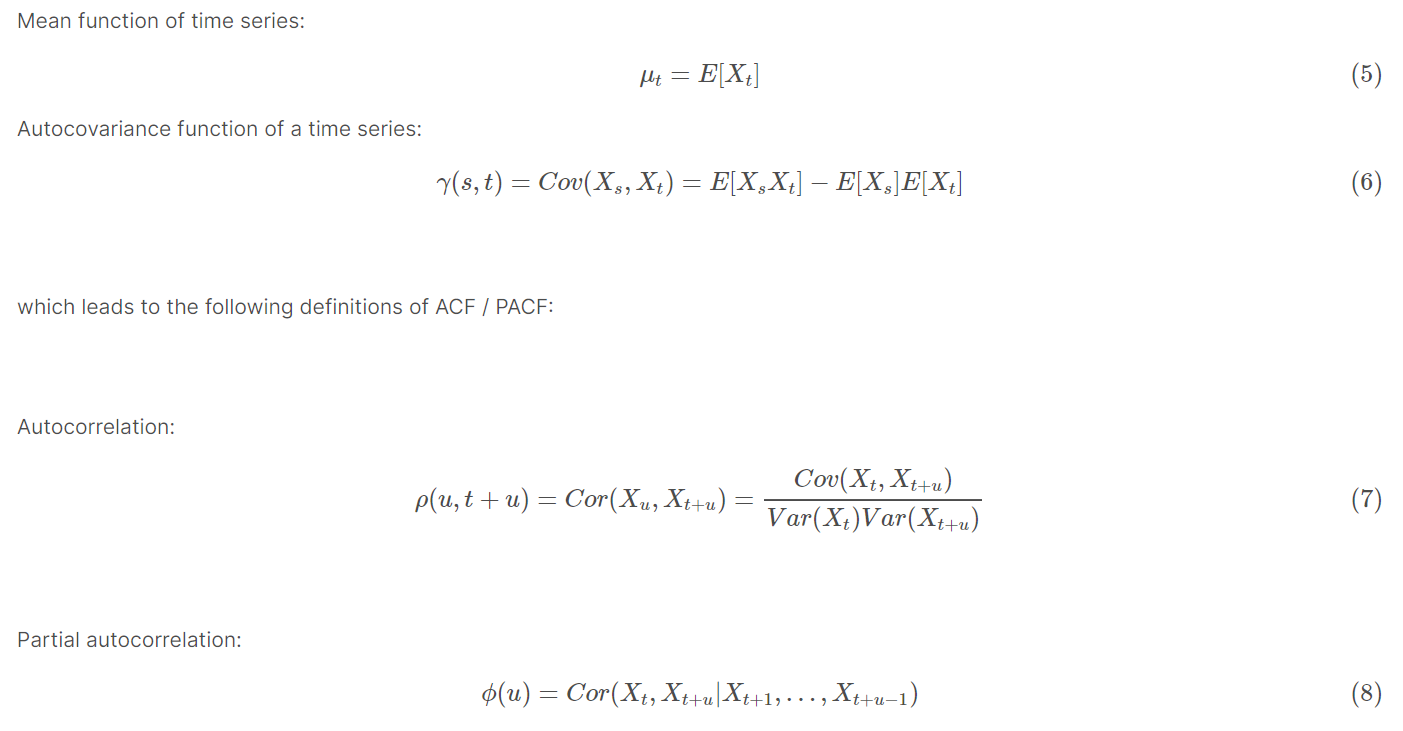

### Stationary

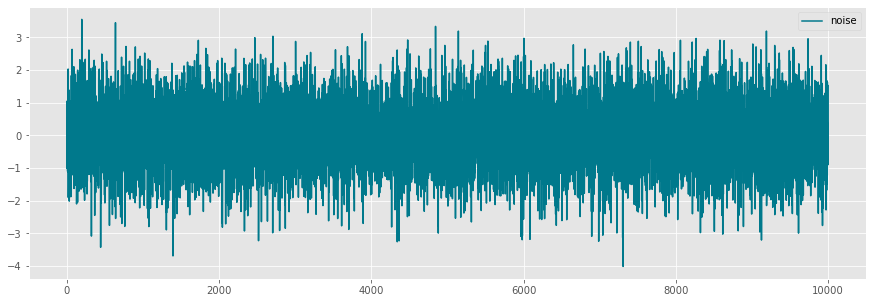

In [32]:
xseries = pd.DataFrame(data = np.random.normal(0, 1, 10000), columns = ['noise'] )
xseries.plot(figsize = (15, 5), color = colors)
print()

array([[<AxesSubplot:title={'center':'noise'}>]], dtype=object)

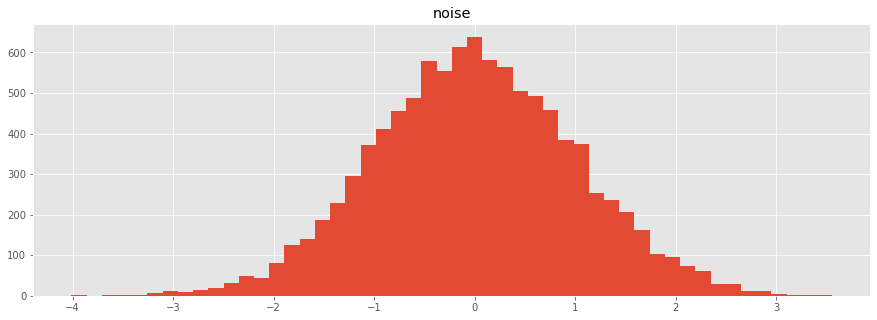

In [34]:
xseries.hist(figsize = (15, 5), bins = 50)

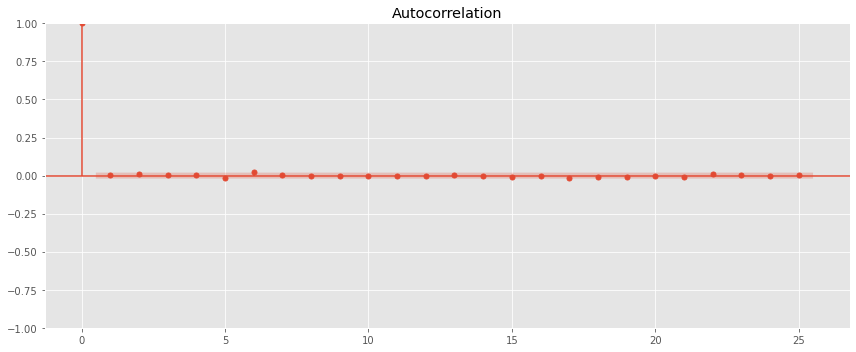

In [41]:
fig = plot_acf(xseries['noise'], lags = 25)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()

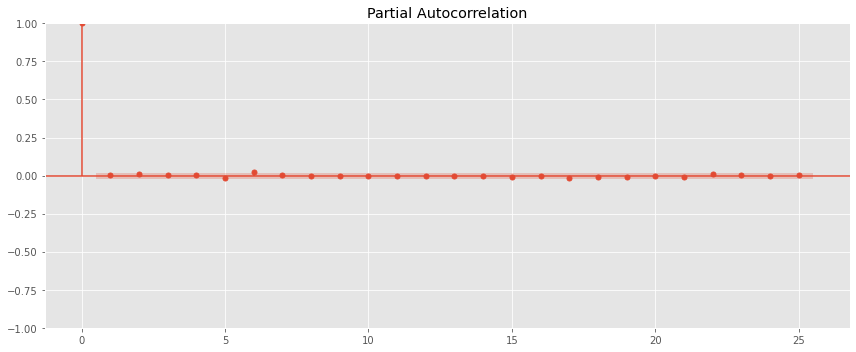

In [42]:
fig = plot_pacf(xseries['noise'], lags = 25)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()

stationary 하지 않은 데이터를 살펴보자.

<AxesSubplot:xlabel='date'>

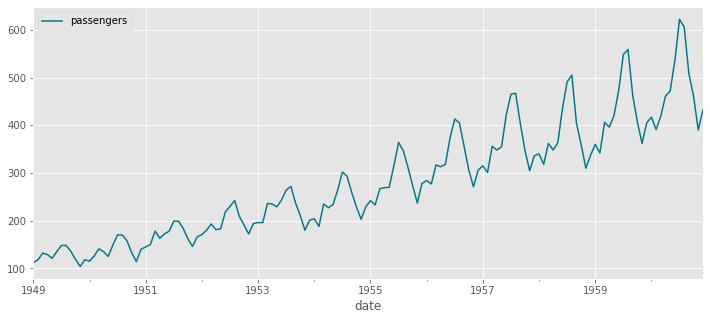

In [43]:
series = pd.read_csv('data/passengers.csv')
series['date'] = pd.to_datetime(series['date'])
series.set_index('date').plot(figsize = (12, 5), color=colors)

<AxesSubplot:>

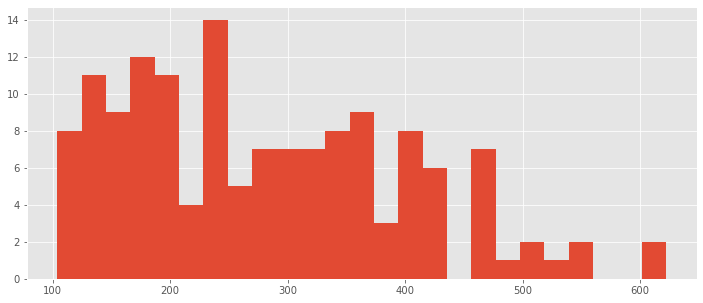

In [44]:
series['passengers'].hist(figsize= (12, 5), bins = 25)

In [45]:
X = series.passengers.values
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 182.90 vs chunk2: 377.69
variance:
chunk1: 2244.09 vs chunk2: 7367.96


- 데이터를 두 구간으로 나눴는데 특성이 다르다.

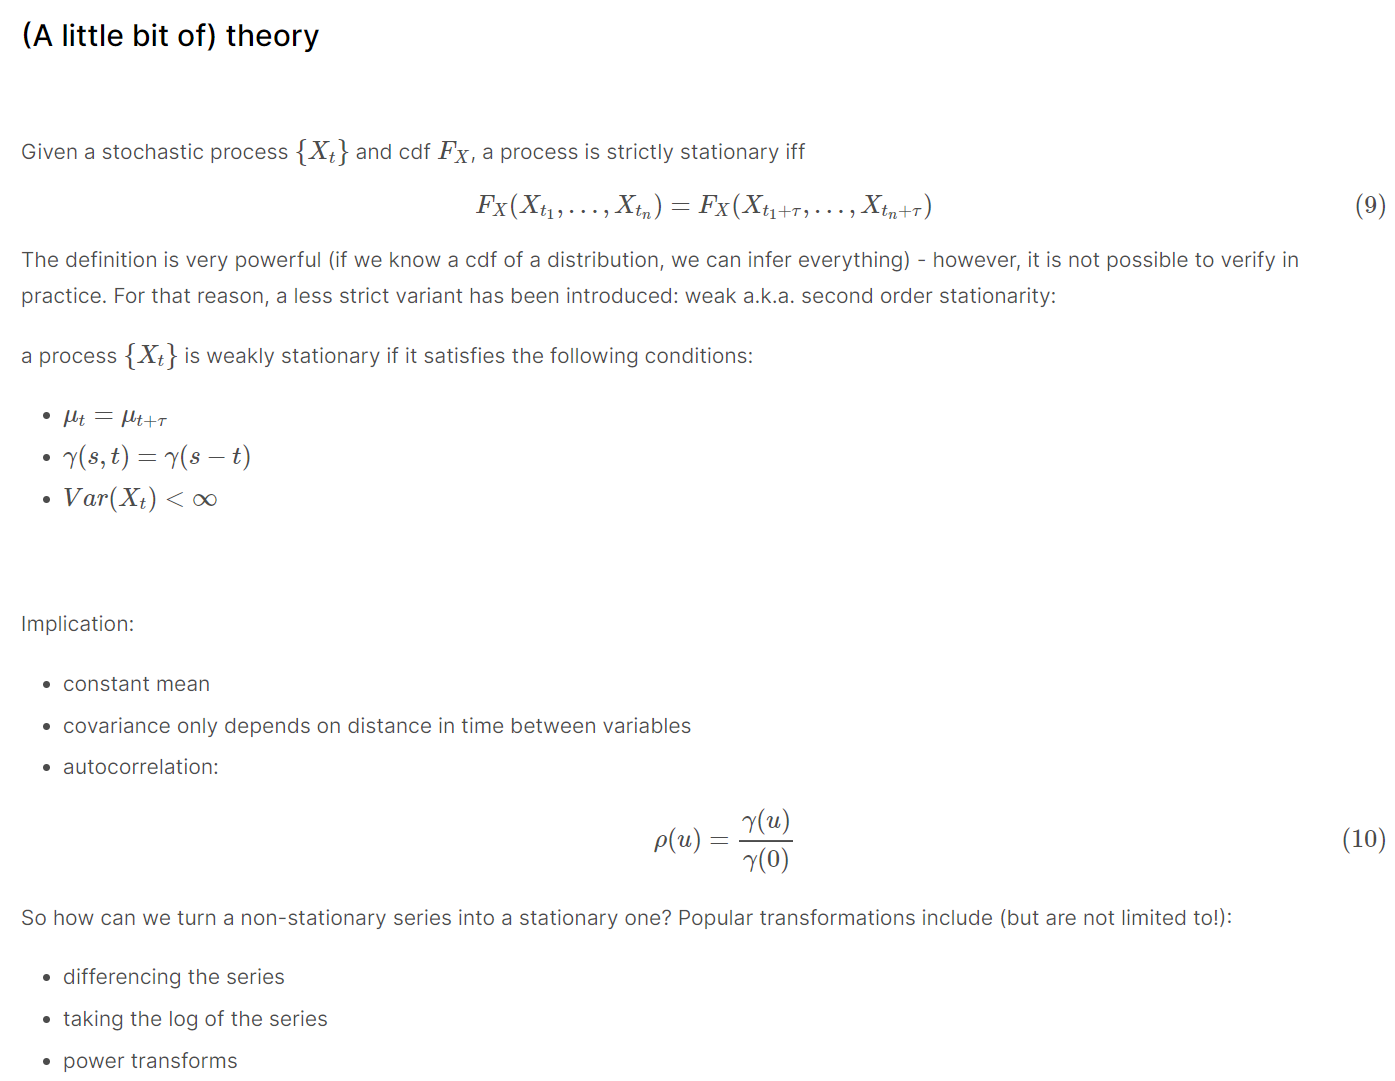

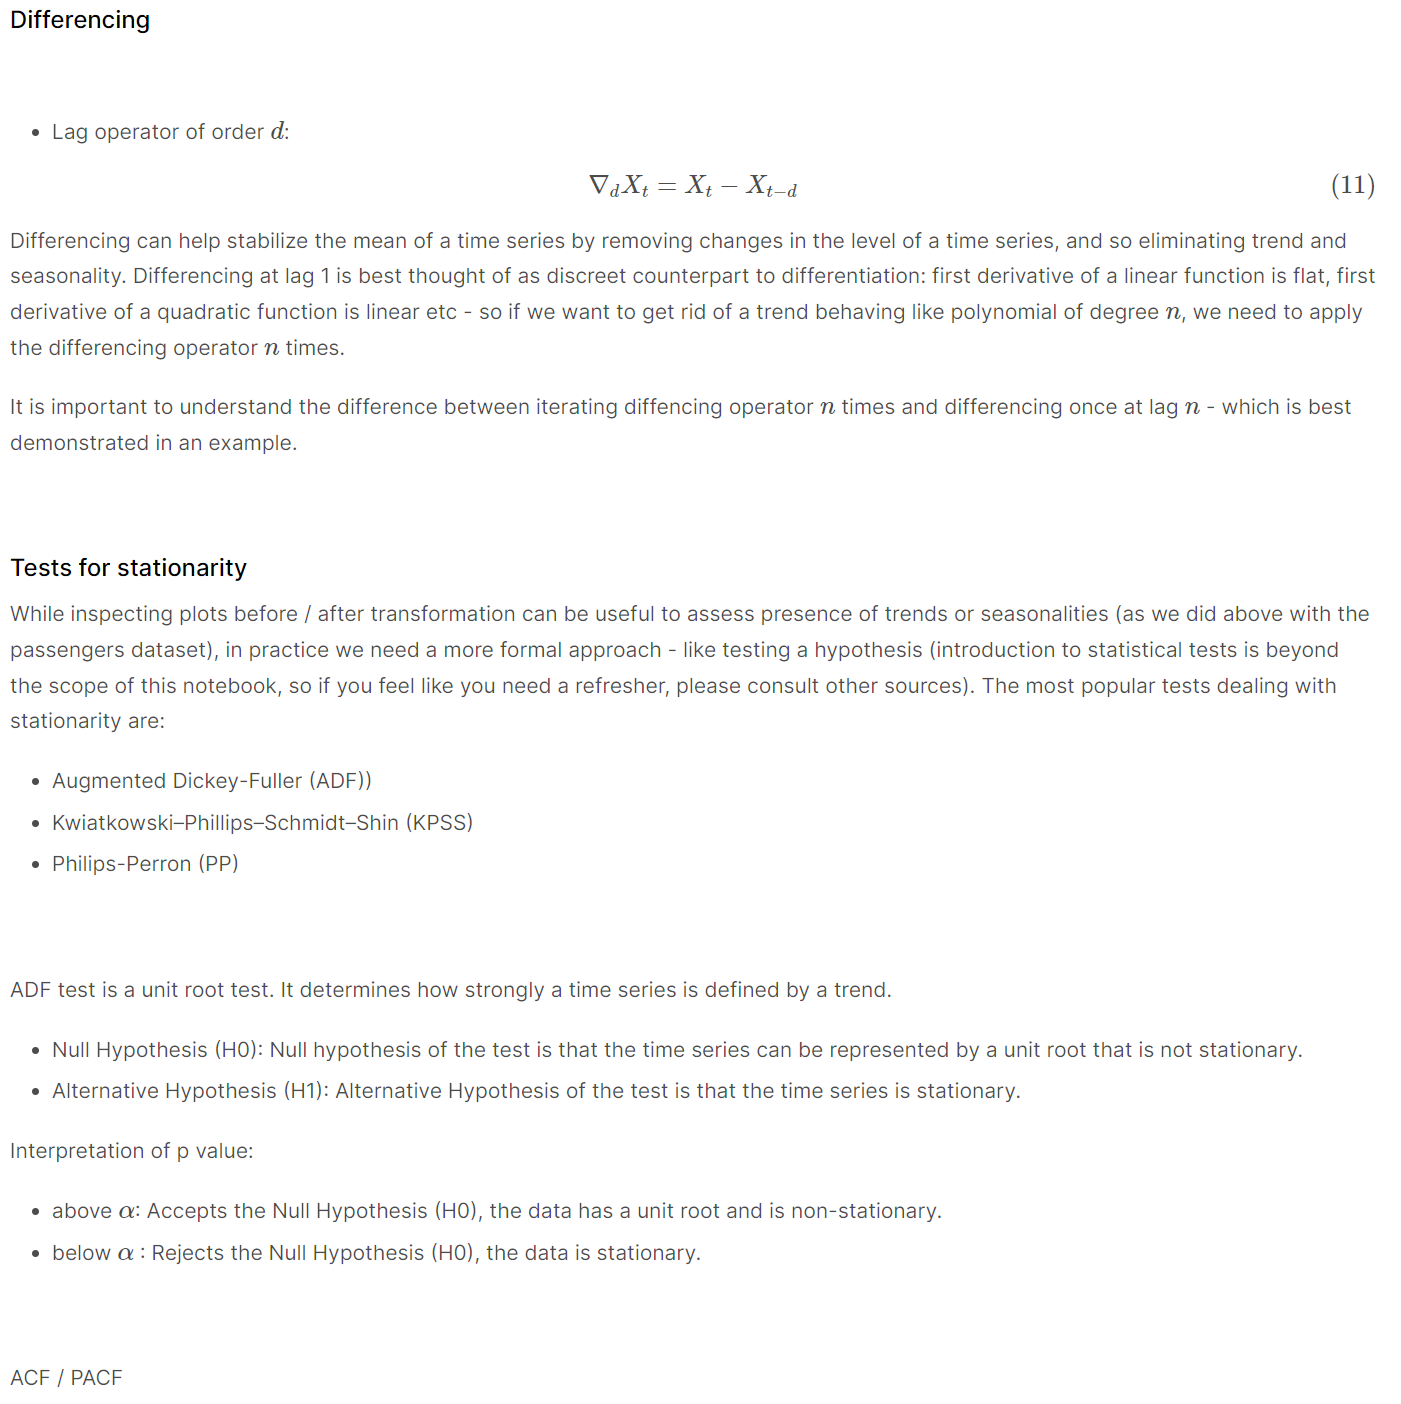

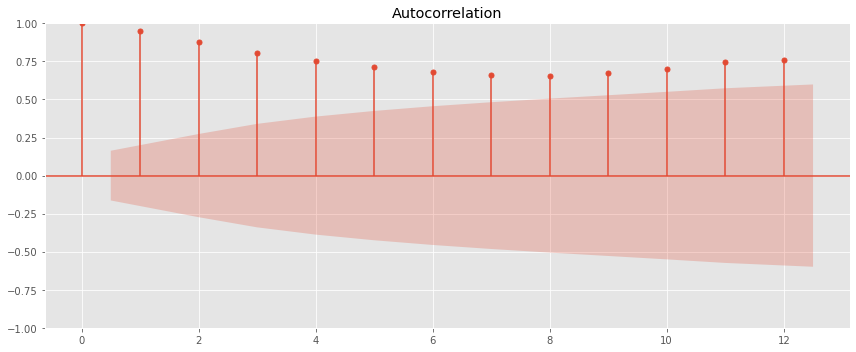

In [49]:
fig = plot_acf(X, lags = 12)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()

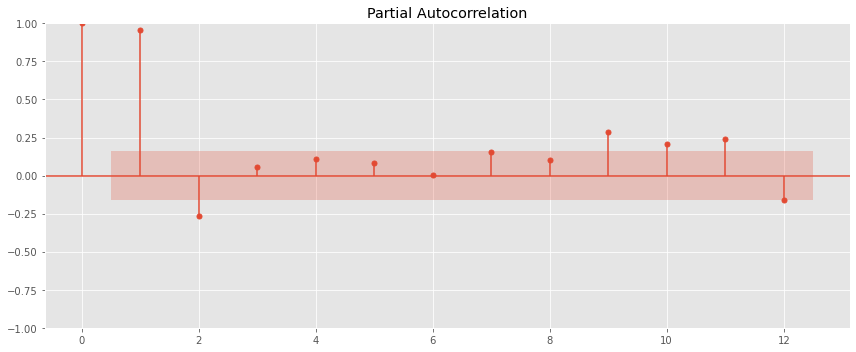

In [50]:
fig = plot_pacf(X, lags = 12)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()

In [51]:
decomposition = seasonal_decompose(X, model='additive', period =12)

In [52]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [53]:
# skip the start of the series: adfuller does not handle missing values which appear for values within the first full period
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.025948
p-value: 0.994532


In [54]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4629246894500387.000000
p-value: 0.000000


In [55]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.029170
p-value: 0.000019


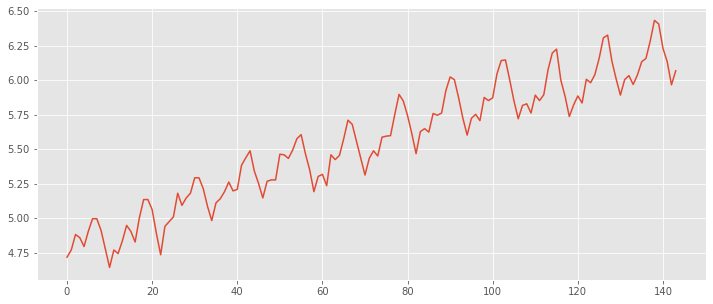

In [57]:
series['passengers2'] = np.log(series['passengers'])
series.passengers2.plot(figsize = (12, 5))
plt.show()

In [58]:
result = adfuller(series.passengers2)
print('p-value: %f' % result[1])

p-value: 0.422367


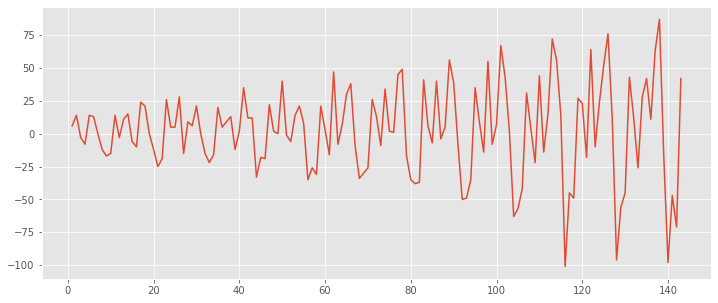

In [62]:
series['passengers3'] = series['passengers'].diff()
series.passengers3.plot(figsize = (12, 5))
plt.show()

In [63]:
result = adfuller(series.passengers3[10:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.830154
p-value: 0.054094


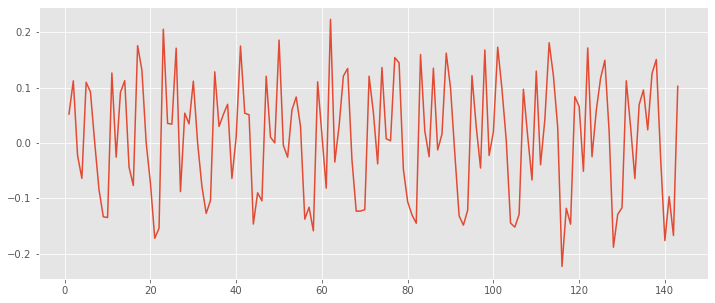

In [64]:
series['passengers4'] = series['passengers'].apply(np.log).diff()
series.passengers4.plot(figsize = (12, 5))
plt.show()

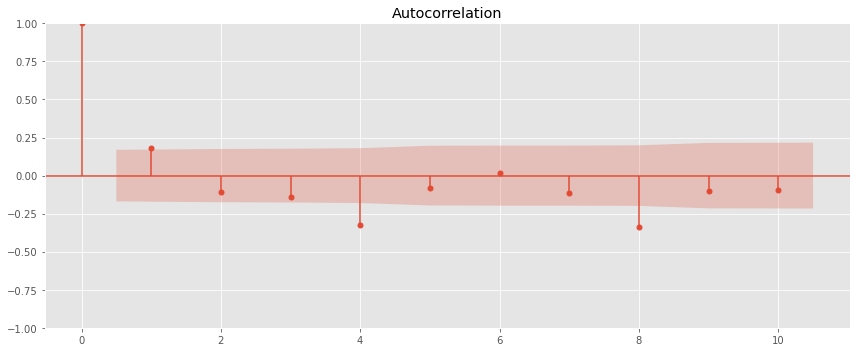

In [65]:
fig = plot_acf(series['passengers4'][10:], lags = 10)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()

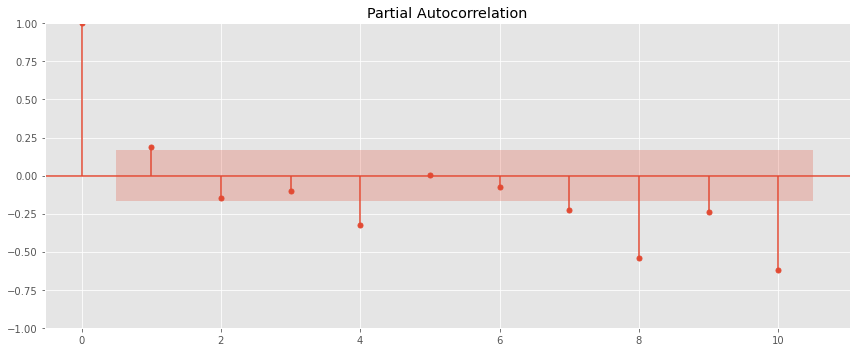

In [66]:
fig = plot_pacf(series['passengers4'][10:], lags = 10)
fig.set_size_inches((12, 5))
fig.tight_layout()
plt.show()